### <span style='color:BLACK'>       EMAIL  : thakurmohitbhadauria@gmail.com              </span>
## <span style='color:BLACK'>       NAME : MOHIT BHADAURIA              </span>
# <span style='color:RED'>       SPAM HAM CLASSIFIER              </span>

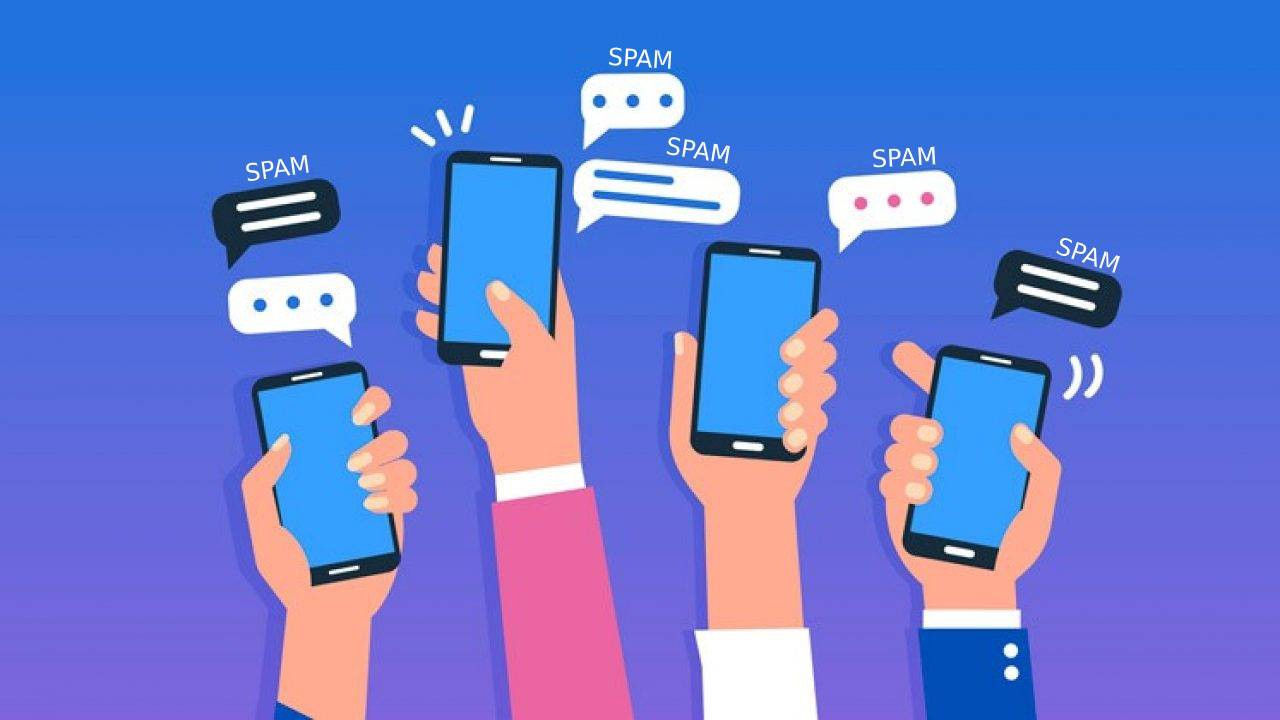

In [79]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("SMSSpamCollection.csv", error_bad_lines=False)

##### 1. Data cleaning
##### 2. EDA
##### 3. Text Preprocessing
##### 4. Model building
##### 5. Evaluation
##### 6. Improvement
##### 7. Website
##### 8. Deploy

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5574 non-null   object
 1   v2      5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## 1. Data Cleaning

In [4]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
data.sample(5)

,v1,v2
1361,ham,Yo dude guess who just got arrested the other day
3386,ham,Ok can...
4749,ham,The beauty of life is in next second.. which h...
640,ham,I had askd u a question some hours before. Its...
173,ham,What time you coming down later?


In [6]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [7]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
data['target'] = encoder.fit_transform(data['target'])

In [12]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
data.duplicated().sum()

403

In [15]:
data = data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()

0

## 2.EDA

In [17]:
data.shape

(5171, 2)

In [18]:
data['target'].value_counts()

0    4518
1     653
Name: target, dtype: int64

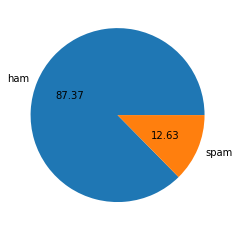

In [19]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
data['num_alphabets'] = data['text'].apply(len)

In [24]:
data = data.rename(columns ={'num_alphabets':'num_characters'})

In [25]:
data.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
data['num_words']= data['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
data['num_sentences'] = data['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [29]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,79.311739,18.583253,1.954554
std,58.322586,13.379066,1.366802
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.872067,17.256529,1.805888
std,56.575000,13.560087,1.281738
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.983155
std,29.821348,6.993008,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

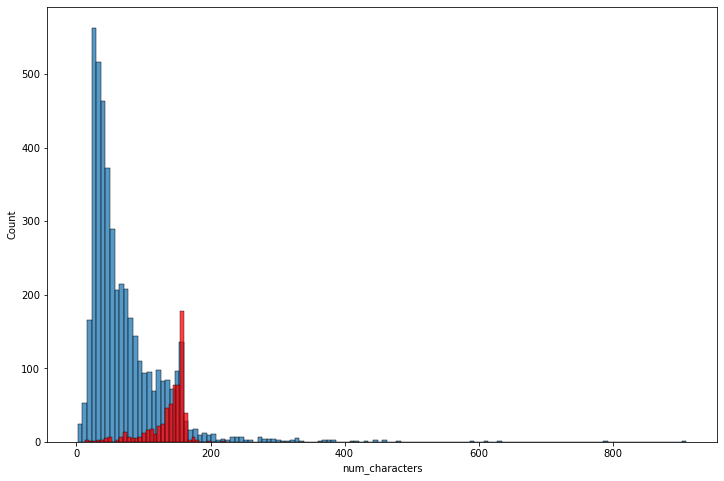

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

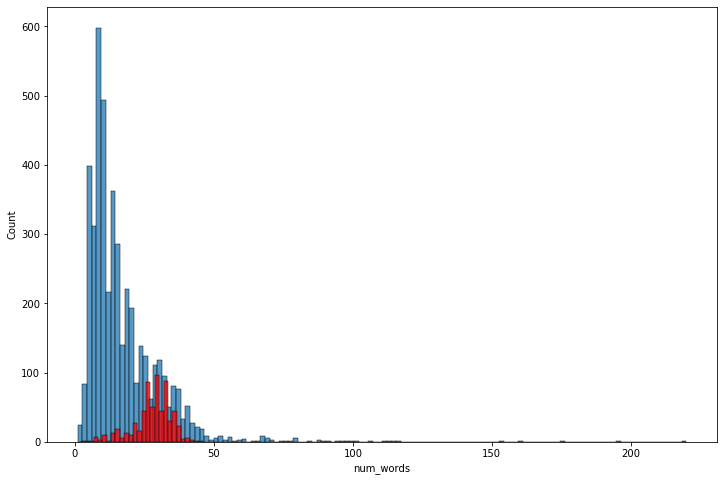

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

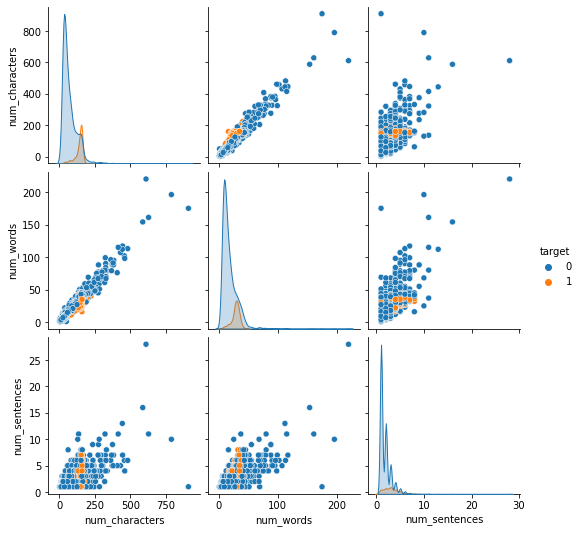

In [36]:
sns.pairplot(data,hue='target')

<AxesSubplot:>

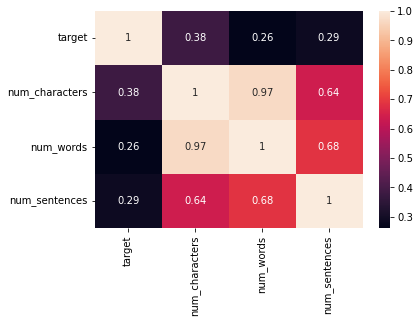

In [37]:
sns.heatmap(data.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
data['transformed_text'] = data['text'].apply(transform_text)

In [46]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud 
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

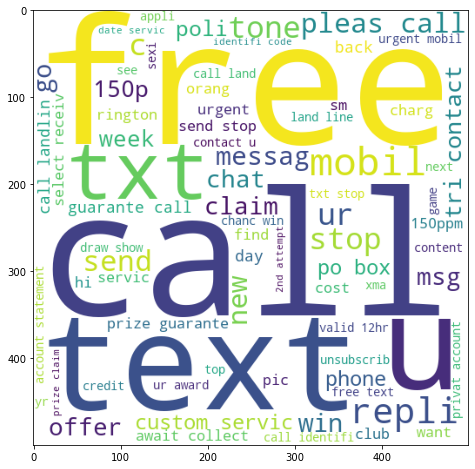

In [50]:
plt.figure(figsize=(18,8))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

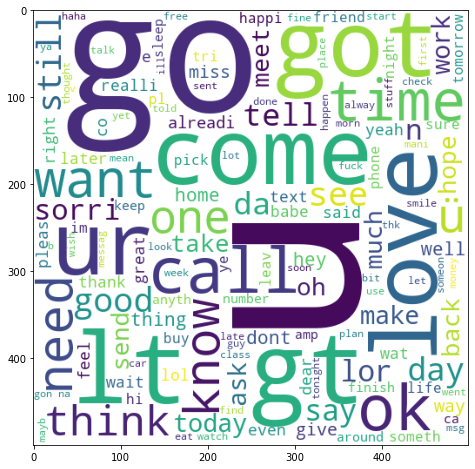

In [52]:
plt.figure(figsize=(18,8))
plt.imshow(ham_wc)

In [53]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9982

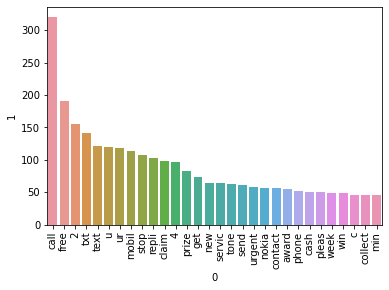

In [55]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35927

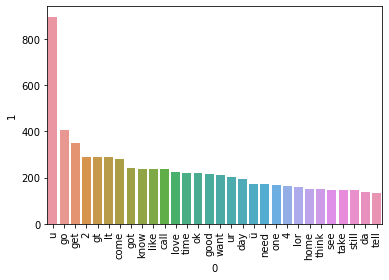

In [58]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [61]:
X.shape

(5171, 3000)

In [62]:
y = data['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8714975845410629
[[784 103]
 [ 30 118]]
0.5339366515837104


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.961352657004831
[[887   0]
 [ 40 108]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729468599033816
[[886   1]
 [ 27 121]]
0.9918032786885246


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [72]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9652173913043478, 0.9590163934426229)

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy -  0.9652173913043478
Precision -  0.9590163934426229
For  KN
Accuracy -  0.9004830917874396
Precision -  1.0
For  NB
Accuracy -  0.961352657004831
Precision -  1.0
For  DT
Accuracy -  0.9207729468599034
Precision -  0.851063829787234
For  LR
Accuracy -  0.9439613526570049
Precision -  0.9411764705882353
For  RF
Accuracy -  0.9642512077294686
Precision -  1.0
For  AdaBoost
Accuracy -  0.961352657004831
Precision -  0.9736842105263158
For  BgC
Accuracy -  0.9526570048309179
Precision -  0.9090909090909091
For  ETC
Accuracy -  0.9748792270531401
Precision -  0.9919354838709677
For  GBDT
Accuracy -  0.9391304347826087
Precision -  0.9775280898876404
For  xgb
Accuracy -  0.9642512077294686
Precision -  0.9826086956521739


In [76]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900483,1.000000
2,NB,0.961353,1.000000
5,RF,0.964251,1.000000
8,ETC,0.974879,0.991935
10,xgb,0.964251,0.982609
9,GBDT,0.939130,0.977528
6,AdaBoost,0.961353,0.973684
0,SVC,0.965217,0.959016
4,LR,0.943961,0.941176
7,BgC,0.952657,0.909091


In [78]:
import pickle

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))